## Practical Pandas & MatplotLib Visualization Assignment

### Learning Objectives
By the end of this assignment, you should be able to:
- Connect Python to an SQLite database
- Load database tables into Pandas DataFrames
- Join multiple tables using merge()
- Perform analytical queries using Pandas
- Visualize insights using matplotlib

### Instructions
 - Answer the questions by filling in the code provided as hint
 - Upload the completed jupter notebook on the portal
 - Deadline is **21st December, 2025**

### Part A: Set Up and Connection

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Connect to the SQLite Database

# HINT:
# - Use sqlite3.connect()
# - The database file must be in the same folder as this notebook OR put the full path to the database file
conn = sqlite3.connect(r"C:/Users/Olaoluwa/Documents/PORA/Data Science/Chinook_Sqlite.sqlite")

In [4]:
#Inspect Available Tables

# HINT:
# Query sqlite_master table to list all tables

tables = pd.read_sql("""
                     SELECT name FROM sqlite_master
                     WHERE type='table'
                    """, conn)
print(tables)


             name
0           Album
1          Artist
2        Customer
3        Employee
4           Genre
5         Invoice
6     InvoiceLine
7       MediaType
8        Playlist
9   PlaylistTrack
10          Track


In [5]:
#  Load All Tables into Pandas DataFrames

def load_table(table_name):
    query = f"SELECT * FROM {table_name}"
    df = pd.read_sql_query(query, conn)
    return df

In [6]:
Album = load_table("Album")
Artist = load_table("Artist")
Customer = load_table("Customer")
Employee = load_table("Employee")
Genre = load_table("Genre")
Invoice = load_table("Invoice")
InvoiceLine = load_table("InvoiceLine")
MediaType = load_table("MediaType")
Playlist = load_table("Playlist")
PlaylistTrack = load_table("PlaylistTrack")
Track = load_table("Track")

In [6]:
##Preview
# HINT:
# Use .head(), .info(), describe() or .shape
Track.head()

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


### Part B: Assignment Questions
Instructions:
- Each question includes hints
- Code is intentionally incomplete
- You must complete the missing logic


#### Question 1 — Join Track, Album & Artist
Explanation: Create a DataFrame containing: - Track name - Album title - Artist name

In [9]:
Track.head(1)

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99


In [7]:
Album.head(1)

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1


In [8]:
Artist.head(1)

,ArtistId,Name
0,1,AC/DC


In [10]:
# HINT:
# 1. Merge Track → Album on AlbumId
# 2. Merge result → Artist on ArtistId


track_album = Track.merge(Album, on="AlbumId", how="left")

track_album_artist = track_album.merge(Artist, on="ArtistId", how="left")

track_album_artist[["Name_x", "Title", "Name_y"]].head()

,Name_x,Title,Name_y
0,For Those About To Rock (We Salute You),For Those About To Rock We Salute You,AC/DC
1,Balls to the Wall,Balls to the Wall,Accept
2,Fast As a Shark,Restless and Wild,Accept
3,Restless and Wild,Restless and Wild,Accept
4,Princess of the Dawn,Restless and Wild,Accept


#### Question 2 — Top 10 Artists by Revenue
Explanation: Find artists that generated the most revenue.

In [11]:
InvoiceLine.head(1)

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity
0,1,1,2,0.99,1


In [17]:
# HINT:
# 1. Merge InvoiceLine → Track → Album → Artist
# 2. Create Revenue = UnitPrice * Quantity
# 3. Group by Artist name
sales = (InvoiceLine.merge(Track, on="TrackId")
         .merge(Album, on="AlbumId")
         .merge(Artist, on="ArtistId"))
        
sales["Revenue"] = sales["UnitPrice_x"] * sales["Quantity"]

artist_revenue = (sales.groupby("Name_y")["Revenue"].sum()
                            .sort_values(ascending=False)
                            .head(10))
artist_revenue

Name_y
Iron Maiden                138.60
U2                         105.93
Metallica                   90.09
Led Zeppelin                86.13
Lost                        81.59
The Office                  49.75
Os Paralamas Do Sucesso     44.55
Deep Purple                 43.56
Faith No More               41.58
Eric Clapton                39.60
Name: Revenue, dtype: float64

In [15]:
sales.columns

Index(['InvoiceLineId', 'InvoiceId', 'TrackId', 'UnitPrice_x', 'Quantity',
       'Name_x', 'AlbumId', 'MediaTypeId', 'GenreId', 'Composer',
       'Milliseconds', 'Bytes', 'UnitPrice_y', 'Title', 'ArtistId', 'Name_y'],
      dtype='object')

#### Question 3 — Visualize Top Artists by Revenue

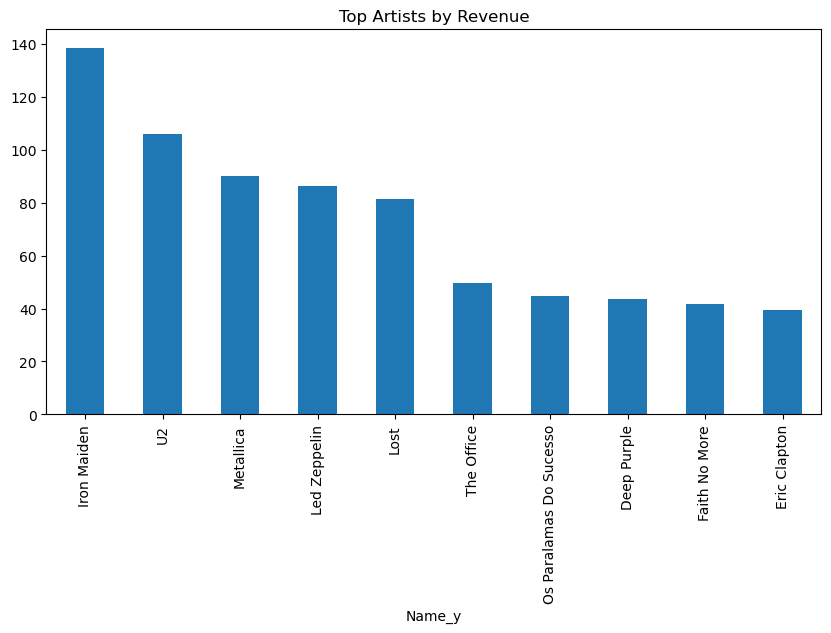

In [22]:
# HINT:
# Use .plot(kind='bar')

artist_revenue.plot(kind="bar", figsize=(10,5), title="Top Artists by Revenue")
plt.show()

#### Question 4 — Revenue by Country

In [23]:
Invoice.head(1)

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98


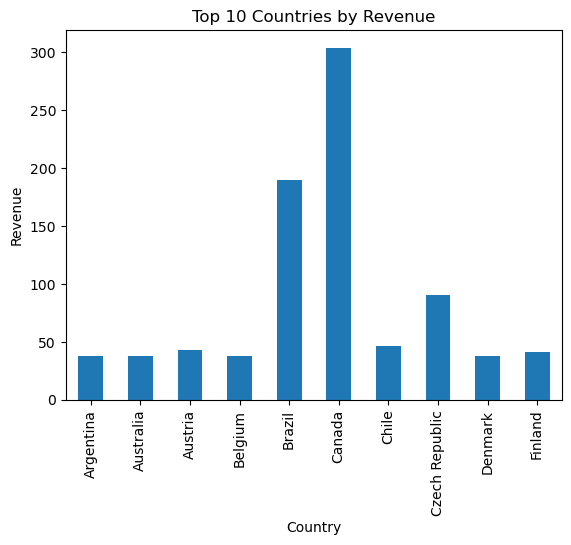

In [25]:
# HINT:
# Group Invoice by BillingCountry and sum Total

country_revenue = Invoice.groupby("BillingCountry")["Total"].sum()

country_revenue.sort_values(ascending=False).head()

top_10_country_revenue= country_revenue.head(10)

top_10_country_revenue.plot(kind='bar',
                           title= 'Top 10 Countries by Revenue',
                           xlabel = 'Country',
                           ylabel ='Revenue')
plt.show()

#### Question 5 - Monthly Revenue Trend

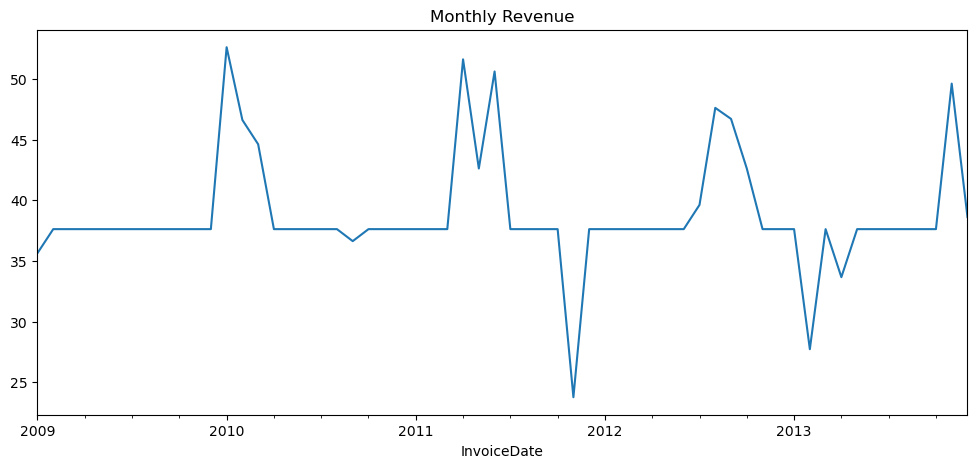

In [29]:
# HINT:
# 1. Convert InvoiceDate to datetime
# 2. Use resample('M')

Invoice["InvoiceDate"] = pd.to_datetime(Invoice["InvoiceDate"])

monthly_revenue = Invoice.resample("ME", on="InvoiceDate")["Total"].sum()

monthly_revenue.plot(figsize=(12,5), title="Monthly Revenue")
plt.show()

#### Question 6 — Track Count per Genre

In [30]:
Genre.head(1)

,GenreId,Name
0,1,Rock


In [33]:
Track.head(1)

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99


In [7]:
# HINT:
# Group Track by GenreId, then merge Genre

genre_count = Track.groupby("GenreId")["TrackId"].count().reset_index()

genre_count = genre_count.merge(Genre, on="GenreId")

genre_count

,GenreId,TrackId,Name
0,1,1297,Rock
1,2,130,Jazz
2,3,374,Metal
3,4,332,Alternative & Punk
4,5,12,Rock And Roll
5,6,81,Blues
6,7,579,Latin
7,8,58,Reggae
8,9,48,Pop
9,10,43,Soundtrack


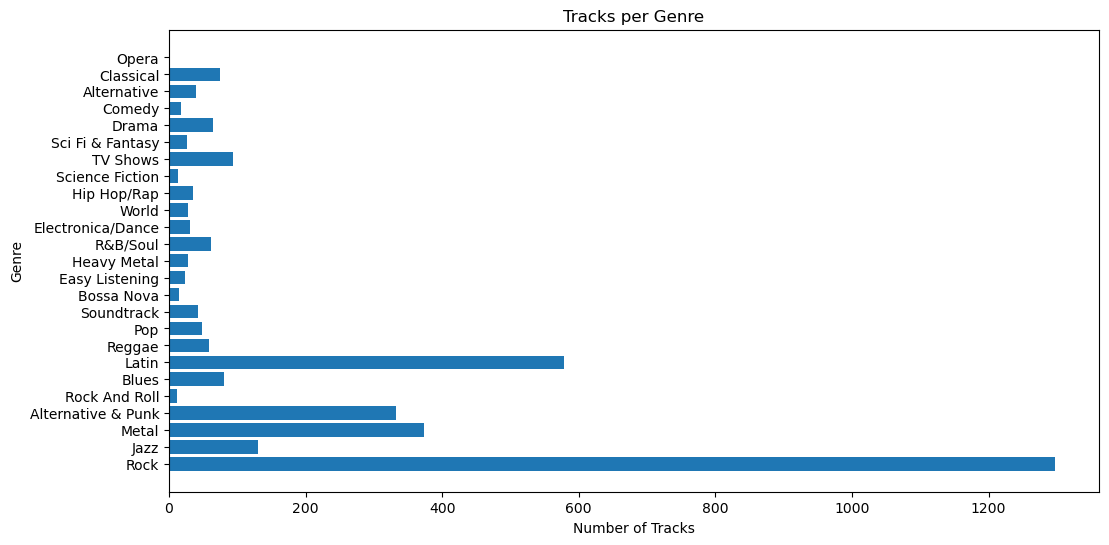

In [15]:
plt.figure(figsize=(12, 6))
plt.barh(genre_count["Name"], genre_count["TrackId"])
plt.xlabel("Number of Tracks")
plt.ylabel("Genre")
plt.title("Tracks per Genre")
plt.show()

#### Question 7 — Average Track Length per Genre (Seconds)

In [17]:
# HINT:
# 1. Convert Milliseconds → Seconds
# 2. Group by GenreId

Track["Seconds"] = Track["Milliseconds"] / 1000

avg_length = Track.groupby("GenreId")["Seconds"].mean().reset_index()

avg_length = avg_length.merge(Genre, on="GenreId")
avg_length

,GenreId,Seconds,Name
0,1,283.910043,Rock
1,2,291.755377,Jazz
2,3,309.749444,Metal
3,4,234.353849,Alternative & Punk
4,5,134.643500,Rock And Roll
5,6,270.359778,Blues
6,7,232.859263,Latin
7,8,247.177759,Reggae
8,9,229.034104,Pop
9,10,244.370884,Soundtrack


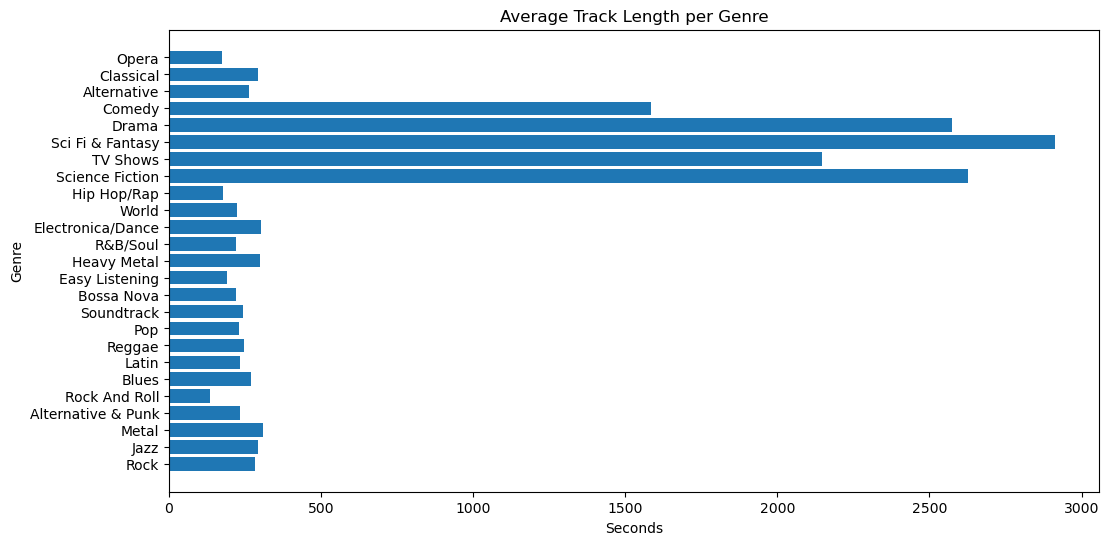

In [18]:
plt.figure(figsize=(12, 6))
plt.barh(avg_length["Name"], avg_length["Seconds"])
plt.xlabel("Seconds")
plt.ylabel("Genre")
plt.title("Average Track Length per Genre")
plt.show()

#### Question 8 — Bestselling Track

In [37]:
InvoiceLine.head(1)

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity
0,1,1,2,0.99,1


In [21]:
# HINT:
# Group InvoiceLine by TrackId and sum Quantity

best_tracks = (InvoiceLine.groupby("TrackId")["Quantity"].sum()
                            .sort_values(ascending=False)
                            .head(10)
                            .reset_index())

best_tracks = best_tracks.merge(Track[["TrackId", "Name"]], on="TrackId")
best_tracks

,TrackId,Quantity,Name
0,626,2,Drum Boogie
1,1590,2,Walter's Walk
2,234,2,Morena De Angola
3,3482,2,"Suite No. 3 in D, BWV 1068: III. Gavotte I & II"
4,443,2,Shock Me
5,1335,2,Where Eagles Dare
6,903,2,Lay Down Sally
7,3488,2,"Music for the Funeral of Queen Mary: VI. ""Thou..."
8,762,2,No No No
9,240,2,Meu Caro Amigo


In [23]:
Track["TrackId"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3503 entries, 0 to 3502
Series name: TrackId
Non-Null Count  Dtype
--------------  -----
3503 non-null   int64
dtypes: int64(1)
memory usage: 27.5 KB


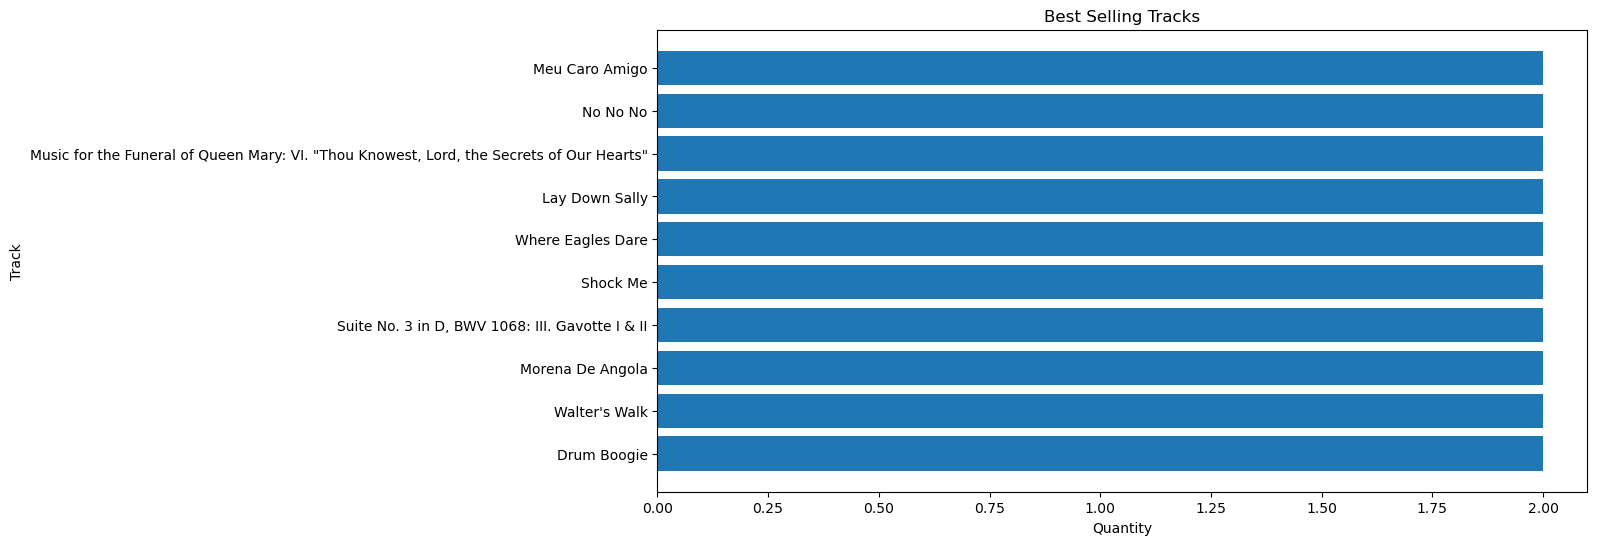

In [25]:
plt.figure(figsize = (12,6))
plt.barh(best_tracks["Name"], best_tracks["Quantity"])
plt.xlabel("Quantity")
plt.ylabel("Track")
plt.title("Best Selling Tracks")
plt.show()

#### Question 9 — Customers per Support Rep

In [39]:
Customer.head(1)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3


In [40]:
Employee.head(1)

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com


In [26]:
# HINT:

# Group Customer by SupportRepId

rep_customers = Customer.groupby("SupportRepId")["CustomerId"].count().reset_index()

rep_customers = rep_customers.merge(Employee[["EmployeeId","LastName"]], 
                                    left_on="SupportRepId", right_on="EmployeeId")

rep_customers


,SupportRepId,CustomerId,EmployeeId,LastName
0,3,21,3,Peacock
1,4,20,4,Park
2,5,18,5,Johnson


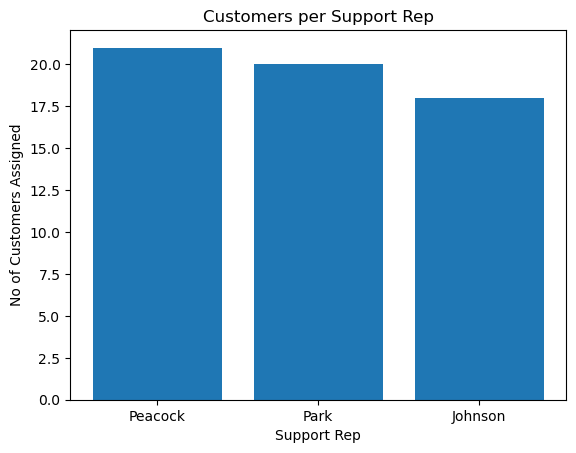

In [27]:
plt.bar(rep_customers["LastName"], rep_customers["CustomerId"])
plt.xlabel("Support Rep")
plt.ylabel("No of Customers Assigned")
plt.title("Customers per Support Rep")
plt.show()

#### Question 10 — Track Length vs Price (Scatter Plot)

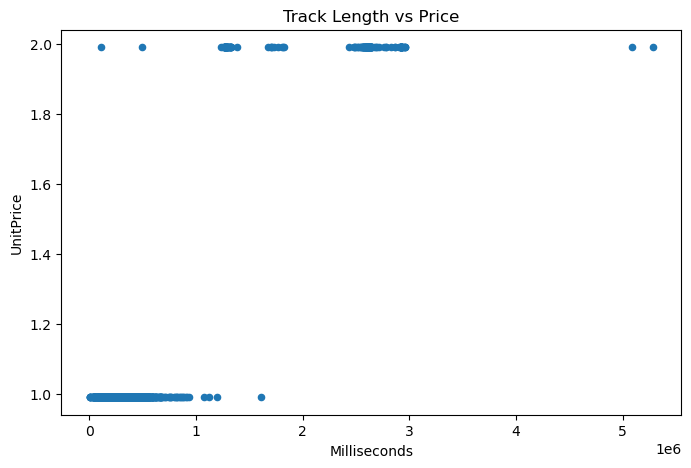

In [42]:
# HINT:
# Use plot(kind='scatter')

Track.plot(kind="scatter", 
           x="Milliseconds", 
           y="UnitPrice",
           figsize=(8,5), 
           title="Track Length vs Price")
plt.show()